In [1]:
import numpy as np
import pandas as pd
import pywt

In [2]:
def fuseCoeff(cooef1, cooef2, method):

    if (method == 'mean'):
        cooef = (cooef1 + cooef2) / 2
    elif (method == 'min'):
        cooef = np.minimum(cooef1,cooef2)
    elif (method == 'max'):
        cooef = np.maximum(cooef1,cooef2)
    else:
        cooef = []

    return cooef

In [4]:
train = pd.read_json("../train.json")
test = pd.read_json("../test.json")

In [5]:
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis]
                          , x_band2[:, :, :, np.newaxis]
                         , ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)

In [6]:
FUSION_METHOD = 'mean'

In [13]:
I1 = x_band1[0]
I2 = x_band2[0]

In [14]:
wavelet = 'db1'
cooef1 = pywt.wavedec2(I1[:,:], wavelet)
cooef2 = pywt.wavedec2(I2[:,:], wavelet)

In [40]:
fusedCooef = []
for i in range(len(cooef1)-1):

    # The first values in each decomposition is the apprximation values of the top level
    if(i == 0):

        fusedCooef.append(fuseCoeff(cooef1[0],cooef2[0],FUSION_METHOD))

    else:

        # For the rest of the levels we have tupels with 3 coeeficents
        c1 = fuseCoeff(cooef1[i][0],cooef2[i][0],FUSION_METHOD)
        c2 = fuseCoeff(cooef1[i][1], cooef2[i][1], FUSION_METHOD)
        c3 = fuseCoeff(cooef1[i][2], cooef2[i][2], FUSION_METHOD)

        fusedCooef.append((c1,c2,c3))

# Third: After we fused the cooefficent we nned to transfor back to get the image
fusedImage = pywt.waverec2(fusedCooef, wavelet)

In [16]:
fusedImage.shape

(38, 38)

In [32]:
fusedImage = np.multiply(np.divide(fusedImage - np.min(fusedImage),(np.max(fusedImage) - np.min(fusedImage))),255)

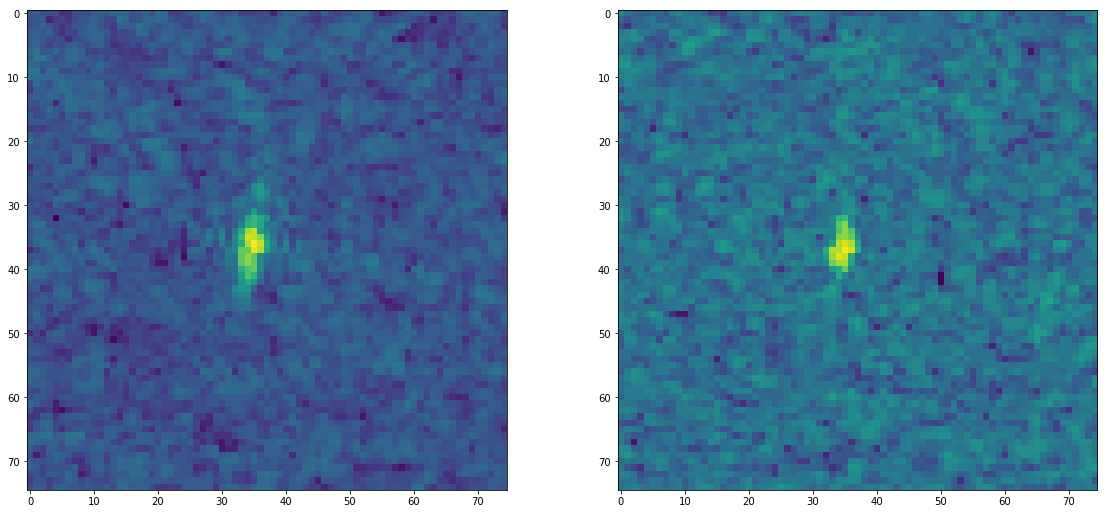

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(30,30))
ax = fig.add_subplot(3,3,1)
ax.imshow(I1)
ax = fig.add_subplot(3,3,2)
ax.imshow(I2)
plt.show()

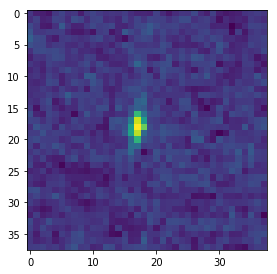

In [34]:
fig = plt.figure(1, figsize = (15,15))
ax = fig.add_subplot(3,3,1)
ax .imshow(fusedImage)
plt.show()

In [33]:
fusedImage

array([[ 39.91714859,  22.08771706,  21.32156372, ...,  41.55625153,
         45.7196846 ,  40.74212646],
       [ 34.28514481,  48.80173492,  24.24718857, ...,  42.97803116,
         38.49192047,  32.19512939],
       [ 56.39547348,  41.88519287,  19.49250412, ...,  51.06682205,
         49.86049652,  45.82269669],
       ..., 
       [ 42.04031754,  19.95109749,  42.75501633, ...,  52.11244965,
         55.74180984,  57.57481766],
       [ 40.92036438,  26.17514801,  31.48521805, ...,  43.61489487,
         56.83757019,  40.46601868],
       [ 44.72877502,  46.68906784,  50.12138748, ...,  37.59776306,
         46.58239365,  44.35044098]], dtype=float32)

In [41]:
print(fusedImage.max(), fusedImage.min())

-17.2746 -65.8046


In [38]:
print(I1.max(), I1.min())
print(I2.max(), I2.min())

-0.213149 -38.2114
-11.2522 -41.1359


In [46]:
np.size(x_band1, 0)


AttributeError: 'numpy.ndarray' object has no attribute 'dim'